In [67]:
import pickle
import numpy as np
import pandas as pd

In [68]:
results = pickle.load(open('./data/walking_results.p','rb'))

In [69]:
data_col = []
for window_size,test_score,test_df,y_test,unique_users_dict in results:
    if len(np.unique(y_test))<20:
        continue
    test_score['train_lengths'] = window_size
    data_col.append(test_score)

In [70]:
scores = pd.concat(data_col)

In [71]:
scores = scores[scores.test_lengths.isin(np.arange(1,177,8))]

In [72]:
scores_mean = scores.groupby(['train_lengths','test_lengths'],as_index=False).mean()

<ipython-input-73-adba20faa958>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dps" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./images/maxmean_boosting.png',dps=1e6)


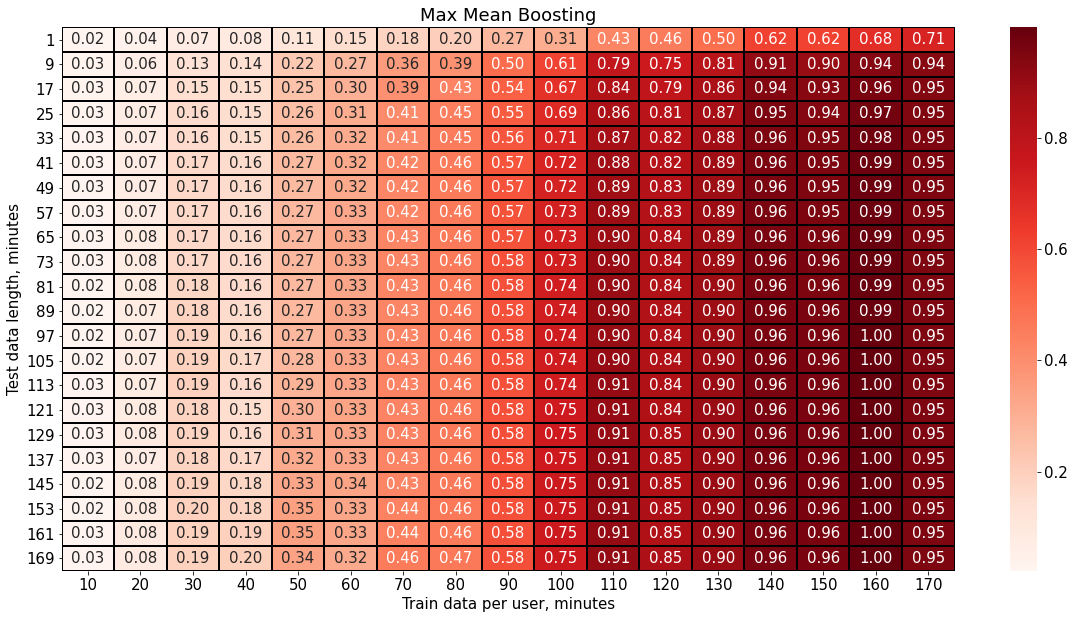

In [73]:
maxmean_score = pd.pivot_table(scores_mean,values='maxmean_score',index='test_lengths',columns='train_lengths',aggfunc='mean')

import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(20,10))
sns.heatmap(maxmean_score,annot=True,fmt='.2f',cmap='Reds',linewidth=1,linecolor='black')
plt.title('Max Mean Boosting')
plt.xlabel('Train data per user, minutes')
plt.ylabel('Test data length, minutes')
plt.savefig('./images/maxmean_boosting.png',dps=1e6)
plt.show()

<ipython-input-74-3814f520ec23>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dps" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./images/majority_boosting.png',dps=1e6)


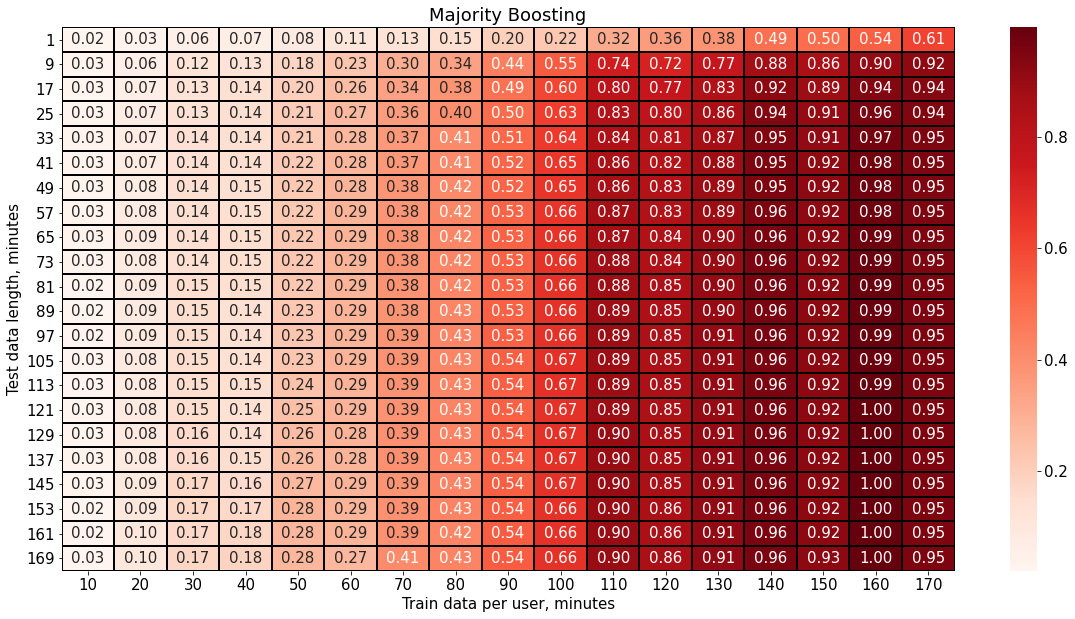

In [74]:
maxmean_score = pd.pivot_table(scores_mean,values='majority_score',index='test_lengths',columns='train_lengths',aggfunc='mean')

import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(20,10))
sns.heatmap(maxmean_score,annot=True,fmt='.2f',cmap='Reds',linewidth=1,linecolor='black')
plt.title('Majority Boosting')
plt.xlabel('Train data per user, minutes')
plt.ylabel('Test data length, minutes')
plt.savefig('./images/majority_boosting.png',dps=1e6)
plt.show()
